In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

%config InlineBackend.figure_format ='retina' 

# Numpy

In [4]:
import numpy as np

### Как задать numpy массив

Можно преобразовать список в массив

In [5]:
a = np.array([3, 4, 1])
print(a, type(a))

[3 4 1] <class 'numpy.ndarray'>


Массивы, заполненные нулями или единицами. Часто лучше сначала создать такой массив, а потом присваивать значения его элементам.

In [6]:
a = np.zeros(3)
print(a)

[0. 0. 0.]


In [7]:
b = np.ones(3)
print(b)

[1. 1. 1.]


Массив из нулей с длиной как другой массив

In [8]:
np.zeros_like(b)

array([0., 0., 0.])

Функция `arange` подобна `range` для массив вида [0, 1, 2, 3,..]

In [9]:
a = np.arange(0, 9, 2)
print(a)

[0 2 4 6 8]


Последовательности чисел с постоянным шагом можно также создавать функцией `linspace`. Начало и конец диапазона включаются; последний аргумент - число точек.

In [10]:
c = np.linspace(0, 1, 101)
print(c)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]


### Размеры массива 

`ndarray.ndim` — число осей (измерений) массива. 

`ndarray.shape` — размеры массива, его форма. Это кортеж натуральных чисел, показывающий длину массива по каждой оси. Для матрицы из `n` строк и `m` столбов, shape будет `(n,m)`. 


In [11]:
a = [[1, 2, 3], [2, 3, 1]]
a = np.array(a)
print('Массив:\n', a, '\n')

print('Размерность:', a.ndim)
print('Размеры:', a.shape)

Массив:
 [[1 2 3]
 [2 3 1]] 

Размерность: 2
Размеры: (2, 3)


### Операции с массивами

`numpy` содержит элементарные функции, которые применяются к массивам поэлементно

In [12]:
a = np.arange(0, 7, 2)
print(a)
print(np.sqrt(a))
print(np.exp(a))
print(np.sin(a))
print(np.log(a + 1))

[0 2 4 6]
[0.         1.41421356 2.         2.44948974]
[  1.           7.3890561   54.59815003 403.42879349]
[ 0.          0.90929743 -0.7568025  -0.2794155 ]
[0.         1.09861229 1.60943791 1.94591015]


Константы

In [13]:
print(np.e, np.pi)

2.718281828459045 3.141592653589793


Сумма и произведение всех элементов массива; максимальный и минимальный элемент; среднее и среднеквадратичное отклонение.

In [14]:
print(a)
a.sum(), a.prod(), a.max(), a.min(), a.mean(), a.std()

[0 2 4 6]


(12, 0, 6, 0, 3.0, 2.23606797749979)

Можно сгенерировать выборку из нормального распределения. Найдем ее выборочное среднее и выборочную дисперсию.

In [15]:
x = np.random.normal(size=1000)
x.mean(), x.std()

(0.03704173673154918, 1.0156990711658072)

Можно производить суммирования по строкам и столбцам

In [16]:
a = [[1, 2, 3], [2, 3, 1]]
a = np.array(a)
print(a)
print(a.sum(axis=1))
print(a.sum(axis=0))
print(a.mean(axis=0))

[[1 2 3]
 [2 3 1]]
[6 6]
[3 5 4]
[1.5 2.5 2. ]


Иногда бывает нужно использовать частичные (кумулятивные) суммы.

In [17]:
print(a)
print(a.cumsum())

[[1 2 3]
 [2 3 1]]
[ 1  3  6  8 11 12]


Объединение массивов "по-горизонтали" (horizontal stack).

In [18]:
a = np.array([1, 2, 3])
b = np.array([100, 200, 300])

print(np.hstack((a, b)))

[  1   2   3 100 200 300]


Объединение массивов "по-вертикали" (vertical stack).

In [19]:
print(np.vstack((a, b)))

[[  1   2   3]
 [100 200 300]]


### Маскирование вместо циклов

Массивы, разумеется, можно использовать в `for` циклах. Но при этом теряется главное преимущество `numpy` - быстродействие. Всегда, когда это возможно, лучше использовать операции над массивами как едиными целыми. Например использовать маски:

In [20]:
X = st.randint.rvs(low=0, high=10, size=5000)

Обычный цикл отработает дольше трех секунд

In [21]:
%%time
count = 0
for el in X:
    if el <= 3:
        count += 1
print(count)

1962
CPU times: user 2.55 ms, sys: 795 µs, total: 3.34 ms
Wall time: 3.63 ms


Маска будет выглядеть как вектор из `True` и `False`

In [22]:
print(X <= 3)

[False False  True ...  True False  True]


Маска будет работать так: если на i-м месте вектора маски стоит `True`, то из i-й элемент массива напечатается, если `False`, то нет

In [23]:
a = np.array([1, 2, 3])
print(a[[True, False, True]])

[1 3]


С масками работает быстрее:

In [24]:
%%time
mask = X <= 3
count = X[mask].shape[0]
print(count)

1962
CPU times: user 268 µs, sys: 864 µs, total: 1.13 ms
Wall time: 963 µs


Для отрицания маски можно воспользоваться символом `~`

In [25]:
%%time
mask = X <= 3
count = X[~mask].shape[0]
print(count)

3038
CPU times: user 1.67 ms, sys: 0 ns, total: 1.67 ms
Wall time: 1.62 ms


# Matplotlib

In [26]:
import matplotlib.pyplot as plt

Чтобы отложить точки на графике используют метод `scatter`

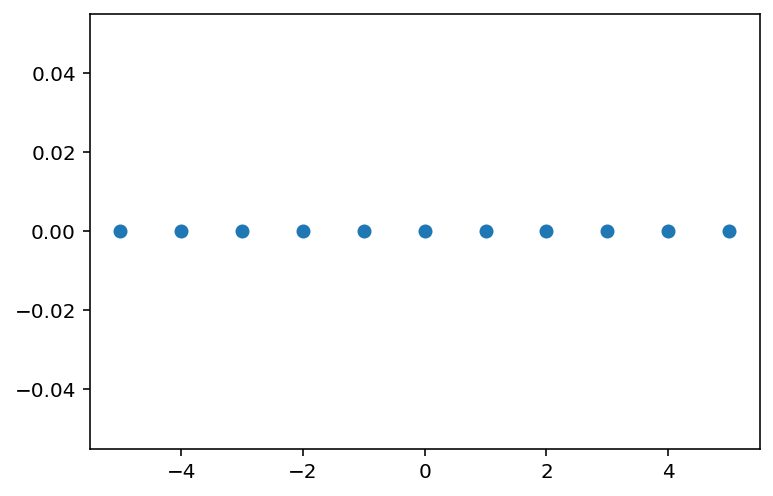

In [31]:
x = np.arange(-5, 6)
y = np.zeros_like(x)

plt.scatter(x, y)
plt.show()

In [32]:
print(x.shape)
print(y.shape)

(11,)
(11,)


Если надо соединить точки: `plot`

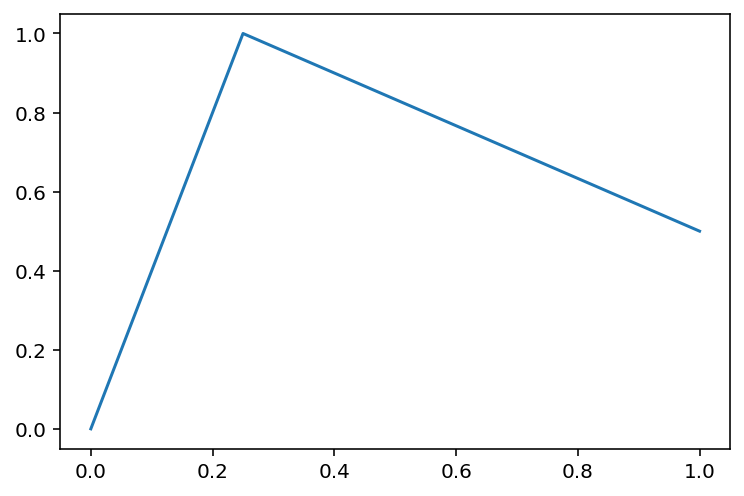

In [33]:
x = [0, 0.25, 1]
y = [0, 1, 0.5]

plt.plot(x, y)
plt.show()

Чтобы построить график синусоиды задаем сетку `grid` из 100 точек. К каждой точке сетки применяем функцию `numpy.sin()`, получаем значения синусоиды, соотвествующие точкам сетки. Затем строим график с помощью plot(). Получается график из ломаных, который близко описывает синусоиду. Чтобы сделать график более плавным можно увеличить число точек в сетке.

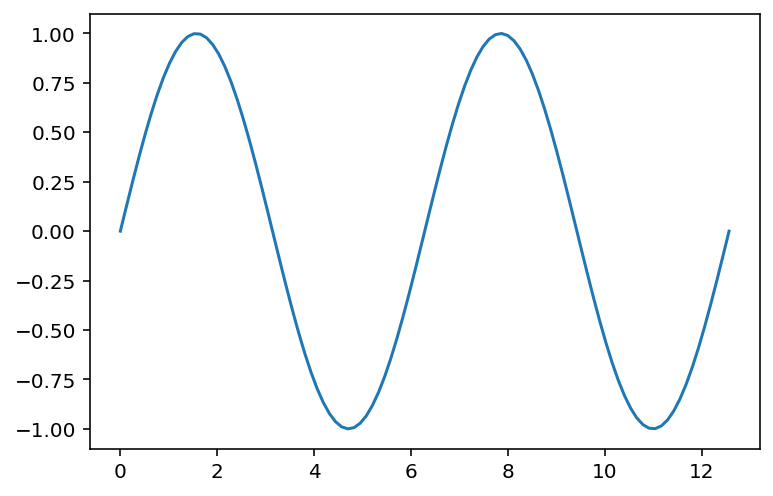

In [34]:
grid = np.linspace(0, 4 * np.pi, 100)

plt.plot(grid, np.sin(grid))
plt.show()

In [35]:
grid

array([ 0.        ,  0.12693304,  0.25386607,  0.38079911,  0.50773215,
        0.63466518,  0.76159822,  0.88853126,  1.01546429,  1.14239733,
        1.26933037,  1.3962634 ,  1.52319644,  1.65012947,  1.77706251,
        1.90399555,  2.03092858,  2.15786162,  2.28479466,  2.41172769,
        2.53866073,  2.66559377,  2.7925268 ,  2.91945984,  3.04639288,
        3.17332591,  3.30025895,  3.42719199,  3.55412502,  3.68105806,
        3.8079911 ,  3.93492413,  4.06185717,  4.1887902 ,  4.31572324,
        4.44265628,  4.56958931,  4.69652235,  4.82345539,  4.95038842,
        5.07732146,  5.2042545 ,  5.33118753,  5.45812057,  5.58505361,
        5.71198664,  5.83891968,  5.96585272,  6.09278575,  6.21971879,
        6.34665183,  6.47358486,  6.6005179 ,  6.72745093,  6.85438397,
        6.98131701,  7.10825004,  7.23518308,  7.36211612,  7.48904915,
        7.61598219,  7.74291523,  7.86984826,  7.9967813 ,  8.12371434,
        8.25064737,  8.37758041,  8.50451345,  8.63144648,  8.75

# Scipy.stats

Список с распределениями, поддерживаемыми библиотекой

https://docs.scipy.org/doc/scipy/reference/stats.html

In [36]:
import scipy.stats as st

- rvs –– *Random variates*
- pdf –– *Probability density function* –– плотность распределения
- cdf –– *Cumulative distribution function* –– функция распределения
- ppf –– *Percent point function* –– обратная к cdf, то есть для заданного значения функции распределения возвращает точку при которой достигается это значение.


### График плотности нормального распределения

Плотность нормального распределения задана на всем $\mathbb{R}$, поэтому для построения графика надо отрезать хвосты распределения. Для этого воспользуемся `ppf`. 

Вспомним правило трех сигм: вероятность того, что случайная величина не отклонится от своего математического ожидания более чем на три среднеквадратических отклонения, равна $99.72\%$. Поэтому в качестве крайней левой точки возьмем знчение `x = st.norm.ppf(0.001)` -- выкинем 0.1\% плотности левого хвоста. Аналогично с правыым хвостом.

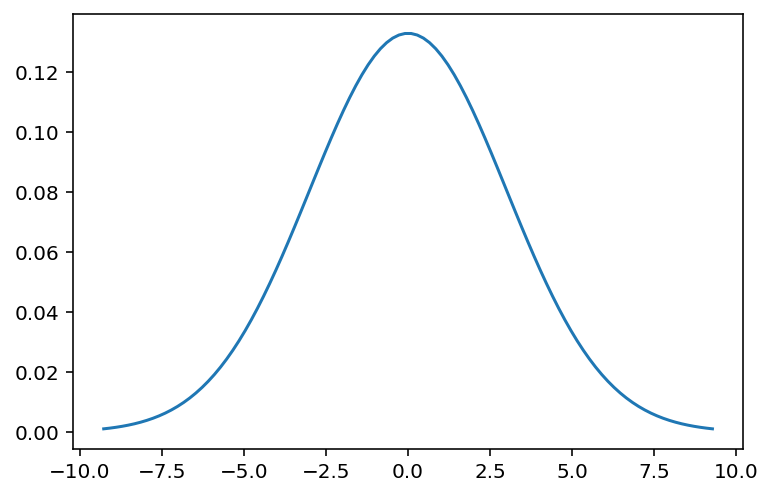

In [37]:
grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=3), st.norm.ppf(0.999, loc=0, scale=3), 100)

# У Norm параметр scale это просто sigma
plt.plot(grid, st.norm.pdf(grid, loc=0, scale=3))
plt.show()

### Функция распределения нормального распределения

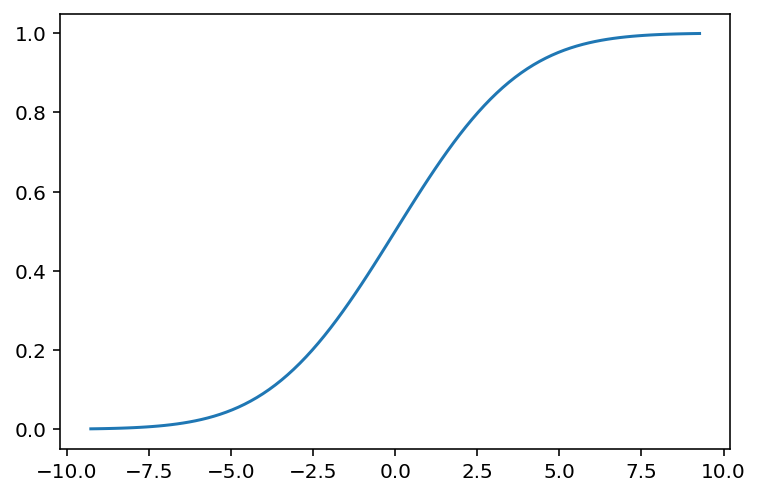

In [38]:
plt.plot(grid, st.norm.cdf(grid, scale=3))
plt.show()

### 0.025-квантиль

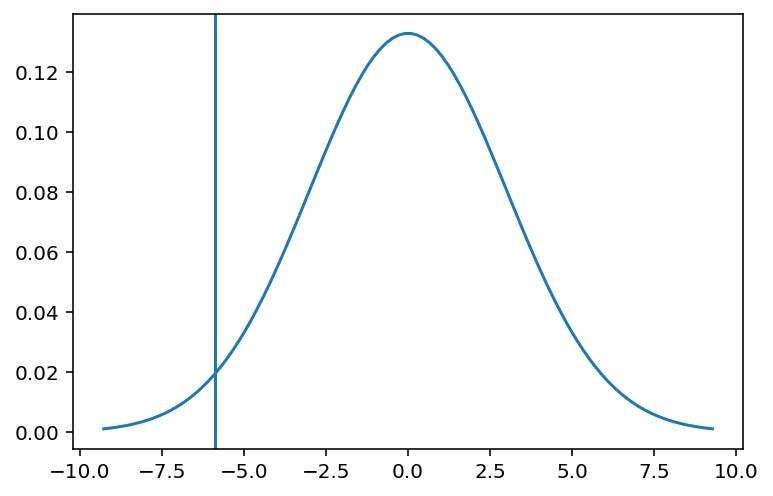

In [39]:
plt.axvline(st.norm.ppf(0.025, scale=3))
plt.plot(grid, st.norm.pdf(grid, scale=3))
plt.show()

Как тут https://openintro.shinyapps.io/dist_calc/ визуализируем вычисление $P(X <= a)$

$P(X <= a)$ это по определению значение функции распределения $F_X(x)$ в точке $a$. Поэтому используем метод `cdf(a)`

In [40]:
from ipywidgets import interactive
from IPython import display

In [41]:
def ppf_visualization(c):
    print('Площадь P(X <= c):', '%.4f' % (st.norm.cdf(c, scale=3)))
    
    grid = np.linspace(st.norm.ppf(0.001, loc=0, scale=3), st.norm.ppf(0.999, loc=0, scale=3), 100)

    # Вертикальная линия
    plt.axvline(c)
    # График плотности распределения
    plt.plot(grid, st.norm.pdf(grid, scale=3))
    # Заполним пространство под графиком плотности левее  вертикальной линии
    plt.fill_between(grid[grid<c], st.norm.pdf(grid[grid<c], loc=0, scale=3), color="royalblue", alpha=0.3)
    plt.show()

v = interactive(
    lambda c: ppf_visualization(c), c=(-10, 10, 0.25),
)

display.display(v)

interactive(children=(FloatSlider(value=0.0, description='c', max=10.0, min=-10.0, step=0.25), Output()), _dom…

### Выборочные статистики

Сгенерируем $N = 10$ реализаций нормально распределенной случайной величины из $\mathcal{N}(0,1)$. То есть получим массив из 10 реализаций случайной величины.

In [42]:
N = 10
x = st.norm.rvs(loc=0, scale=1, size=N)
print('Выборка:', x)

Выборка: [-1.35810983 -0.10433403 -0.62980735 -0.97344147  0.39389813 -2.13882795
 -0.78214484 -1.01161792 -0.71535825  0.96461916]


Можно использовать все что есть в `numpy`:

In [43]:
print(type(x))
print('Выборочное среднее:\t', "%.4f" % x.mean())
print('Выборочная медиана:\t', "%.4f" % np.median(x))
print('Выборочная дисперсия:\t', "%.4f" % x.std())
print('Максимальное значение:\t', "%.4f" % x.max())
print('Минимальное значение:\t', "%.4f" % x.min())

<class 'numpy.ndarray'>
Выборочное среднее:	 -0.6355
Выборочная медиана:	 -0.7488
Выборочная дисперсия:	 0.8347
Максимальное значение:	 0.9646
Минимальное значение:	 -2.1388


**Пример:** Логнормальное распределение

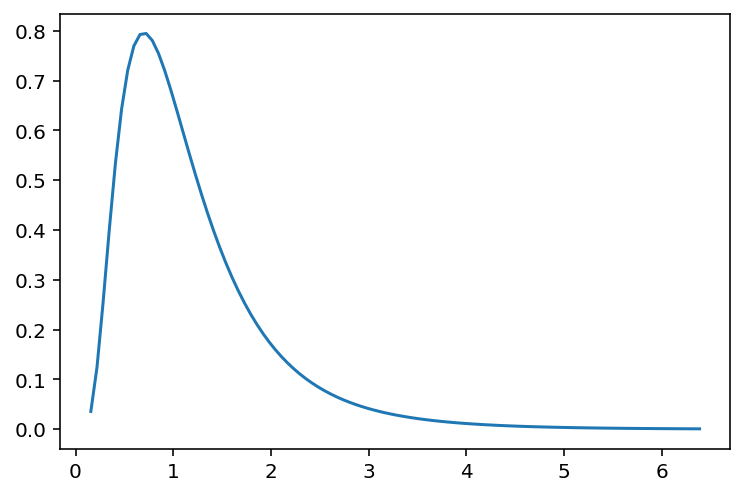

Теоретическое среднее:			 1.1972
Теоретическая медиана:			 1.0000
Теоретическая дисперсия:		 0.6211
Теоретический коэффициент асимметрии:	 2.2601
Теоретический коэффициент эксцесса:	 10.2734


In [45]:
s = 0.6

grid = np.linspace(st.lognorm.ppf(0.001, s), st.lognorm.ppf(0.999, s), 100)

plt.plot(grid, st.lognorm.pdf(grid, s))
plt.show()

mean, var, skew, kurt = st.lognorm.stats(s, moments='mvsk')
median = st.lognorm.median(s)
print('Теоретическое среднее:\t\t\t', "%.4f" % mean)
print('Теоретическая медиана:\t\t\t', "%.4f" % median)
print('Теоретическая дисперсия:\t\t', "%.4f" % var)
print('Теоретический коэффициент асимметрии:\t', "%.4f" % skew)
print('Теоретический коэффициент эксцесса:\t', "%.4f" % kurt)

Выборочный коэффициент асимметрии:	 2.0683
Выборочный коэффициент эксцесса:	 7.5658
Интерквартильынй размах:		 0.8336


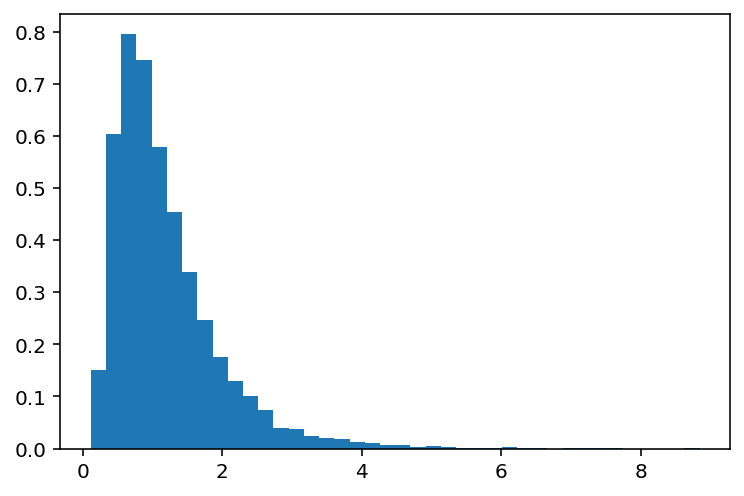

In [46]:
N = 10000
s = 0.6
X = st.lognorm.rvs(s, size=N)

plt.hist(X, density=True, bins=40)

print('Выборочный коэффициент асимметрии:\t', "%.4f" % st.skew(X))
print('Выборочный коэффициент эксцесса:\t', "%.4f" % st.kurtosis(X))
print('Интерквартильынй размах:\t\t', "%.4f" % st.iqr(X))

**Пример**: Экспоненциальное распределение $\text{Exp}(3)$

- Сгенерируем выборку
- Построим плотность распределения
- Построим гистограмму по выборке



Выборочное среднее: 0.2993091077823934


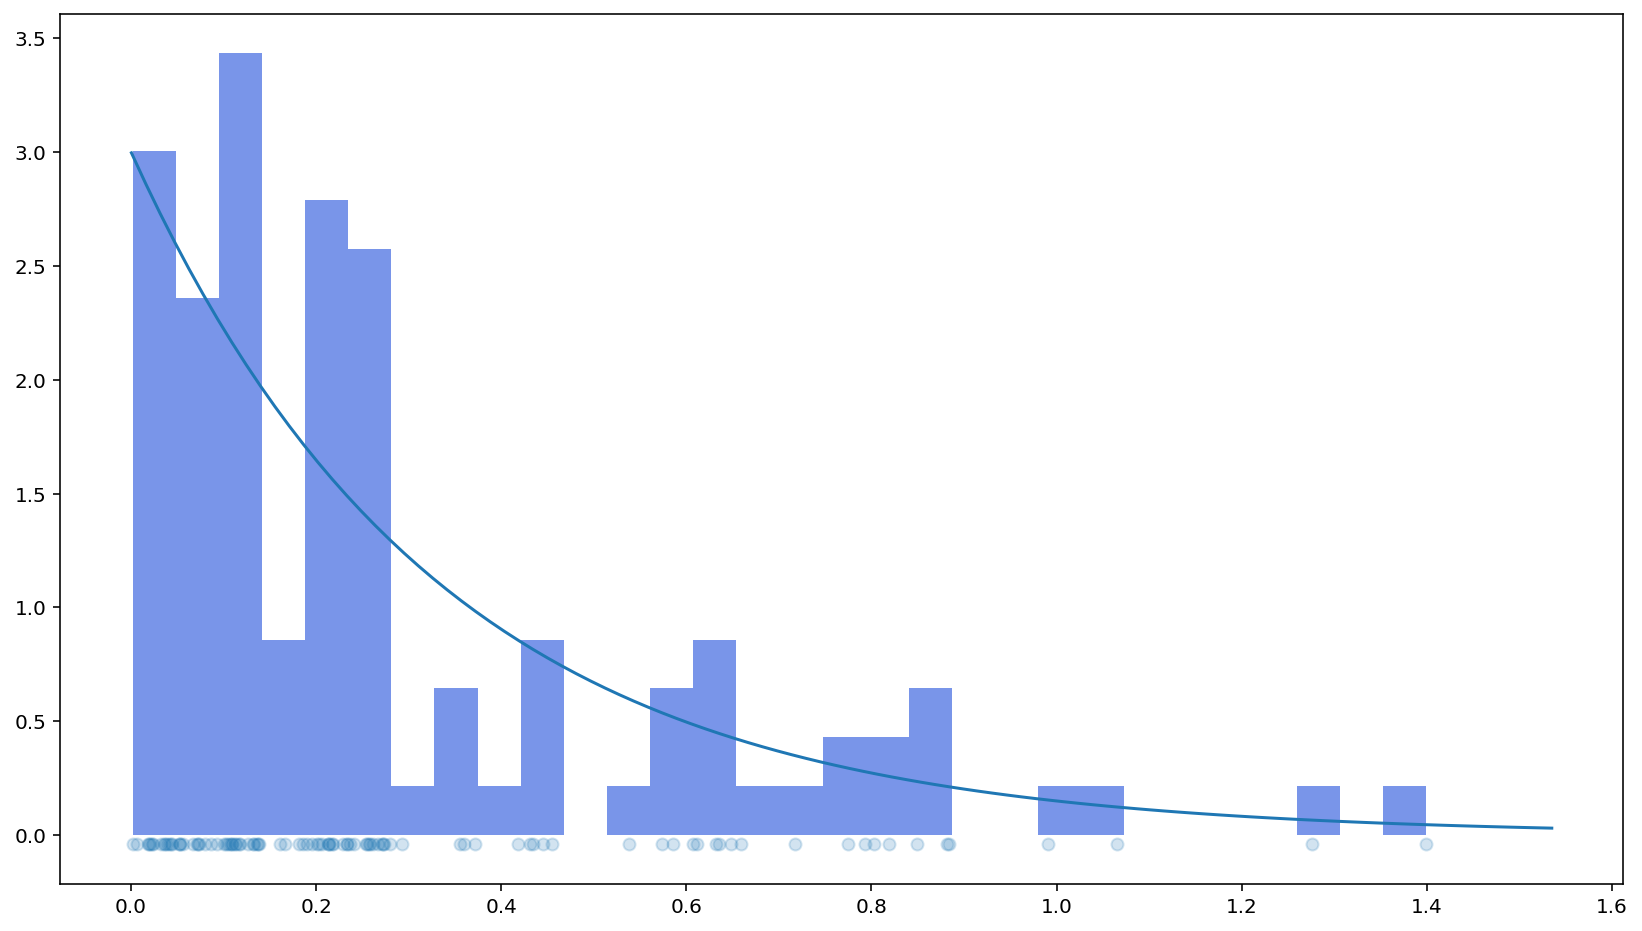

In [47]:
# Размер выборки
N = 100
# У Expon параметр scale это 1/lambda
scale=1/3

X = st.expon.rvs(scale=scale, size=N)
print('Выборочное среднее:', X.mean())

# Сетка для построения графика плотности
grid = np.linspace(st.expon.ppf(scale=scale, q=0.001), 
                   st.expon.ppf(scale=scale, q=0.99), 100)

# Размер полотна
plt.figure(figsize=(14,8))
# Плотность распределения
plt.plot(grid, st.expon.pdf(grid, scale=scale))
# Реализации выборки
plt.scatter(X, np.zeros(N)-0.04, alpha=0.2) #alpha -- прозрачность
# Гистограмма
plt.hist(X, bins=30, density=True, color='royalblue', alpha=0.7)

plt.show()

# ЦПТ

Хотим посмотреть как распределено среднее значение выборки, соответсвующей $\text{Exp}(3)$. В этом случае будет удобно сразу сгенерировать матрицу, состоящую из значений случайной величины из $\text{Exp}(3)$. Затем посчитаем значение статистики для каждой строки.

ЦПТ:
$$\frac{\sum\limits_{i=1}^nX_i - n \cdot \mathbb{E}X_1}{\sigma\sqrt{n}} \to^d \mathcal{N}(0,1)$$

Дано:
$$X \sim \text{Exp}(3), \mathbb{E}X = \frac{1}{3}, \sigma^2 = \mathbb{D}X = \frac{1}{9}$$

ЦПТ:
$$\frac{\sum\limits_{i=1}^nX_i - \frac{1}{3}n}{\frac{1}{3}\sqrt{n}} \to^d \mathcal{N}(0,1)$$

$$\frac{n}{n}\frac{\sum\limits_{i=1}^nX_i - \frac{1}{3}n}{\frac{1}{3}\sqrt{n}} \to^d \mathcal{N}(0,1)$$

$$\frac{\sum\limits_{i=1}^nX_i}{n} - \frac{1}{3} \to^d \mathcal{N}\left(0,\frac{1}{9}\frac{1}{n}\right)$$

$$\frac{\sum\limits_{i=1}^nX_i}{n} \to^d \mathcal{N}\left(\frac{1}{3},\frac{1}{9}\frac{1}{n}\right)$$

In [50]:
def clt_visualization_exp(N, n_experiments=1000):
    print('Размер выборки:', N)

    # У Expon параметр scale это 1/lambda
    scale=1/3

    # Задаем размер матрицы: size=(n_experiments, N) 
    X = st.expon.rvs(scale=scale, size=(n_experiments, N))
    means = X.mean(axis=1)
    print('Выборочный коэффициент асимметрии:', "%.4f" % st.skew(means))

    # Сетка для построения графика плотности
    grid = np.linspace(st.norm.ppf(loc=1/3, scale=(1/9 * 1/N)**0.5, q=0.001), 
                    st.norm.ppf(loc=1/3, scale=(1/9 * 1/N)**0.5, q=0.999), 100)
    plt.plot(grid, st.norm.pdf(grid, loc=1/3, scale=(1/9 * 1/N)**0.5))

    plt.hist(means, density=True, color='royalblue', alpha=0.8)
    
    plt.show()

Размер выборки: 2
Выборочный коэффициент асимметрии: 1.4964


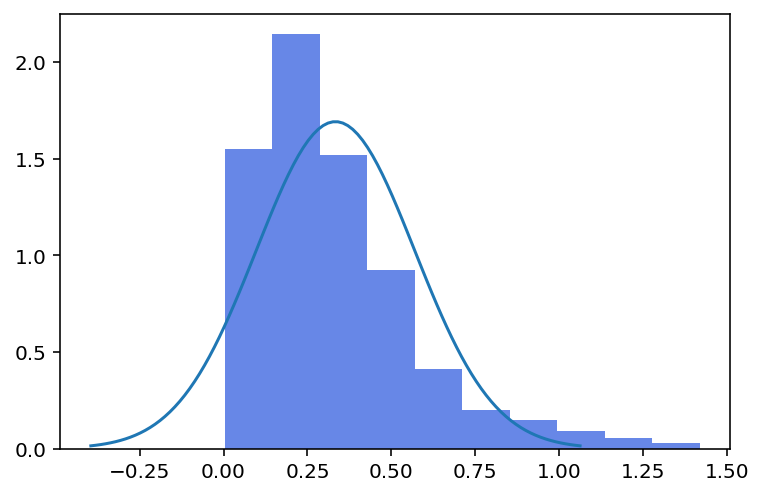

Размер выборки: 5
Выборочный коэффициент асимметрии: 0.9917


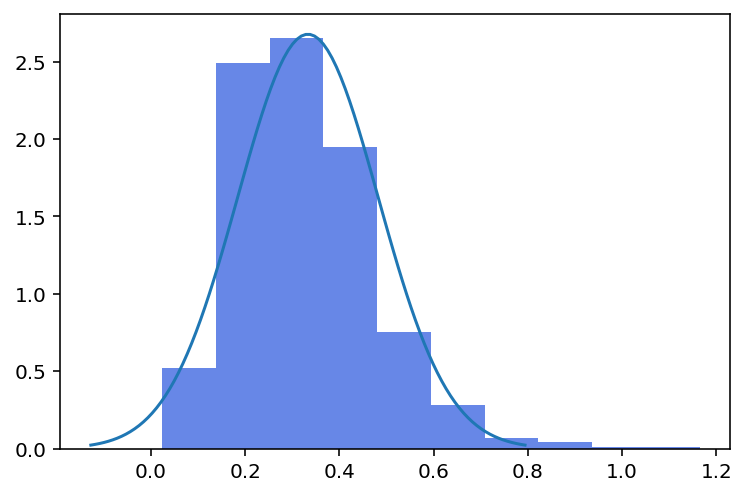

Размер выборки: 25
Выборочный коэффициент асимметрии: 0.4857


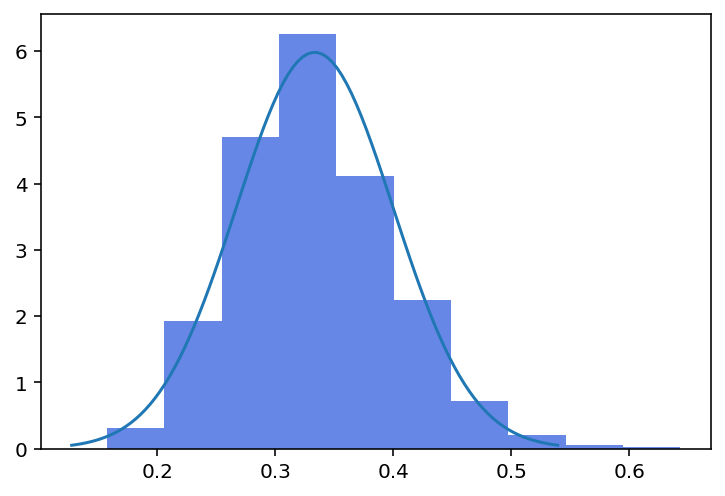

Размер выборки: 100
Выборочный коэффициент асимметрии: 0.0238


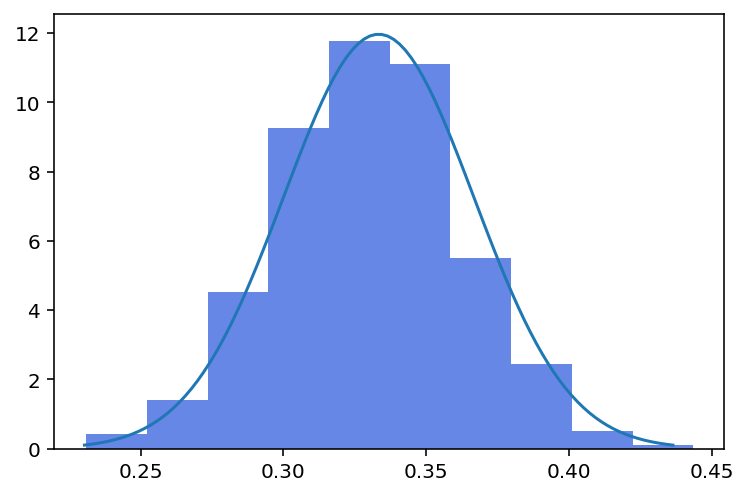

Размер выборки: 1000
Выборочный коэффициент асимметрии: 0.0597


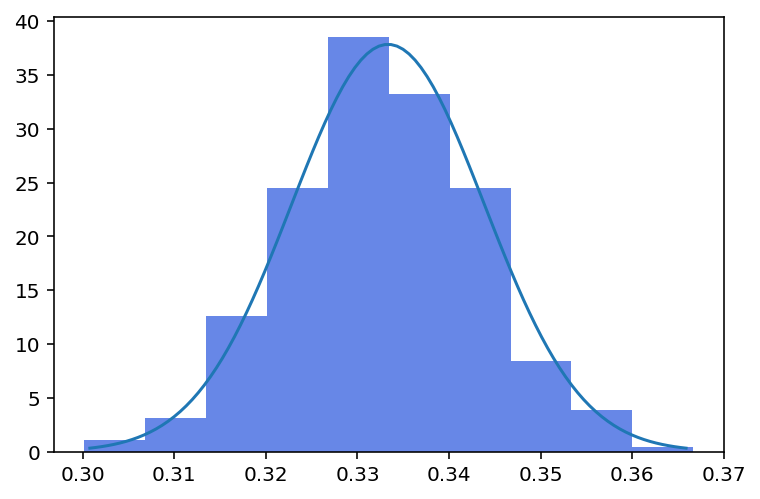

In [51]:
clt_visualization_exp(2)
clt_visualization_exp(5)
clt_visualization_exp(25)
clt_visualization_exp(100)
clt_visualization_exp(1000)

# Распределение с произвольной плотностью 

Напишем класс для случаной величины имеющей плотность
$$p(x) = 
\begin{cases}
3x^2, 0 \leqslant x \leqslant 1;\\
0
\end{cases}.$$

$$\int_{0}^{1} p(x)dx = \int_{0}^{1} 3x^2dx = x^3|_0^1 = 1.$$

In [53]:
class my_continuous_pdf(st.rv_continuous):
    def _pdf(self,x):
        return 3*x**2

my_cv = my_continuous_pdf(a=0, b=1, name='my_continuous_pdf')

mean, var, skew, kurt = my_cv.stats(moments='mvsk')
median = my_cv.median()

print('Теоретическое среднее:\t\t\t', "%.4f" % mean)
print('Теоретическая медиана:\t\t\t', "%.4f" % median)
print('Теоретическая дисперсия:\t\t', "%.4f" % var)
print('Теоретический коэффициент асимметрии:\t', "%.4f" % skew)
print('Теоретический коэффициент эксцесса:\t', "%.4f" % kurt)

Теоретическое среднее:			 0.7500
Теоретическая медиана:			 0.7937
Теоретическая дисперсия:		 0.0375
Теоретический коэффициент асимметрии:	 -0.8607
Теоретический коэффициент эксцесса:	 0.0952


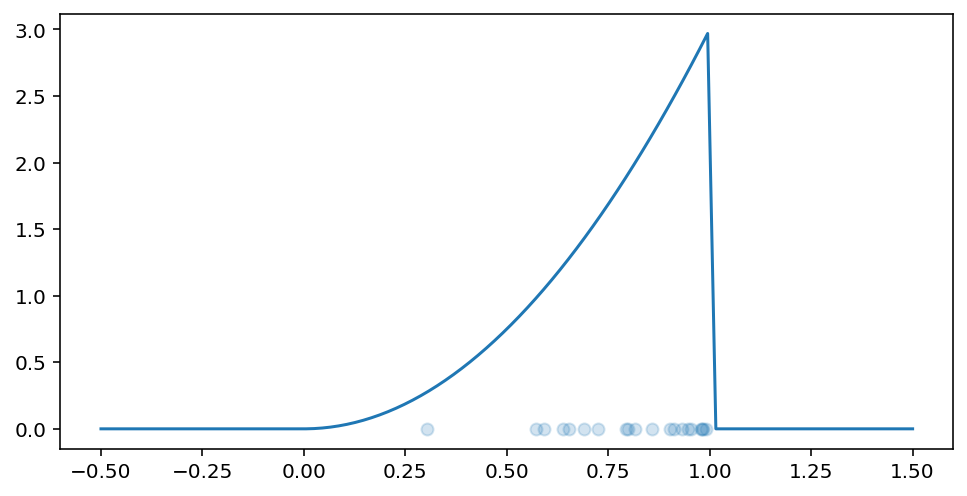

In [ ]:
X = my_cv.rvs(size=20)

grid = np.linspace(-0.5, 1.5, 100)

plt.figure(figsize=(8,4))
plt.plot(grid, my_cv.pdf(grid))
plt.scatter(X, np.zeros_like(X), alpha=0.2)
plt.show()

# Как оценить вероятность с помощью геометрии

**Пример:** вычисление числа $\pi$.

Такой подход называется Методом Монте-Карло. Существует теоретическая оценка скорости сходимости метода МК: ошибка убывает как $\mathcal{O}\left(\dfrac{1}{\sqrt{N}}\right)$.

$$p = \dfrac{\pi R^2}{4}$$ 

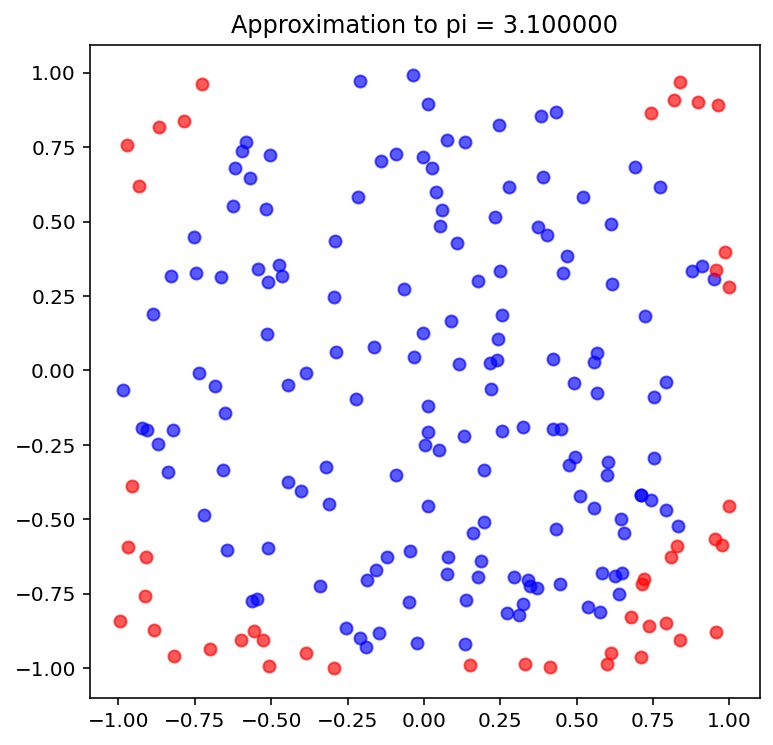

In [54]:
N_points = 200
X = st.uniform.rvs(loc=-1, scale=2, size=N_points)
Y = st.uniform.rvs(loc=-1, scale=2, size=N_points)

r2 = X ** 2 + Y ** 2
mask_inside = r2 < 1

plt.figure(figsize=(6,6))

plt.title("Approximation to pi = %f" % (4*mask_inside.sum()/float(N_points)))

plt.scatter(X[mask_inside], Y[mask_inside], c='b', alpha=0.65)
plt.scatter(X[~mask_inside], Y[~mask_inside], c='r', alpha=0.65)

plt.show()